haythem 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('TAIPEI_diabetes.csv')
df.head(5)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
df_mesurments = df.iloc[:, 1:-1] #exclude the <PatientID> and the <Diabetic> columns because they will not provide any additional information.
df_mesurments.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


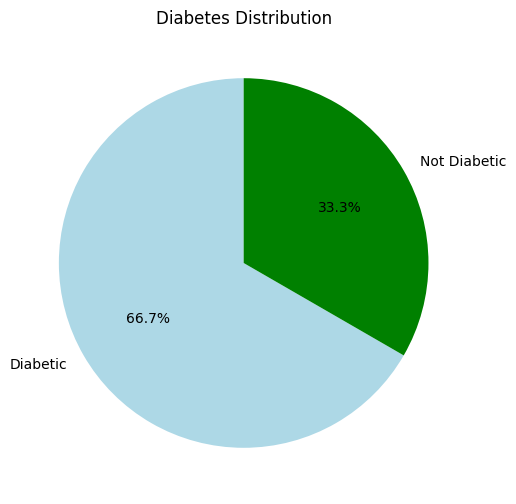

In [4]:
patients_df = df["Diabetic"]
counts = patients_df.value_counts()
labels = ['Diabetic', 'Not Diabetic']
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'green'], startangle=90)
plt.title('Diabetes Distribution')
plt.show()

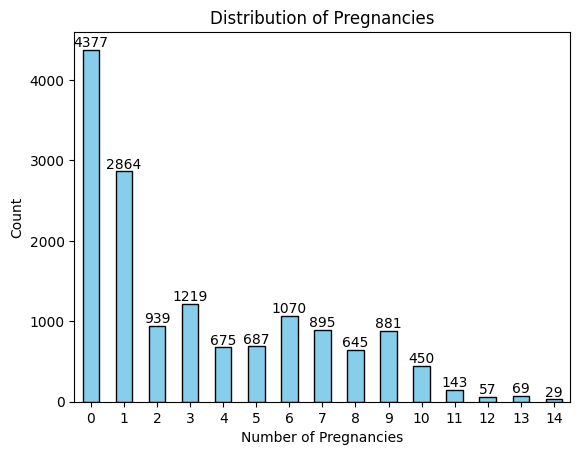

In [5]:
# Plot of number Women based on how many times they have been pregnant .

preg_count = df['Pregnancies'].value_counts().sort_index()
preg_count.plot(kind='bar', color='skyblue', edgecolor='black')

 # Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Distribution of Pregnancies')
plt.xticks(rotation=0) 
for i, value in enumerate(preg_count):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [6]:
correlations = df.corr()
diabetic_corr = correlations['Diabetic'].sort_values(ascending=False)

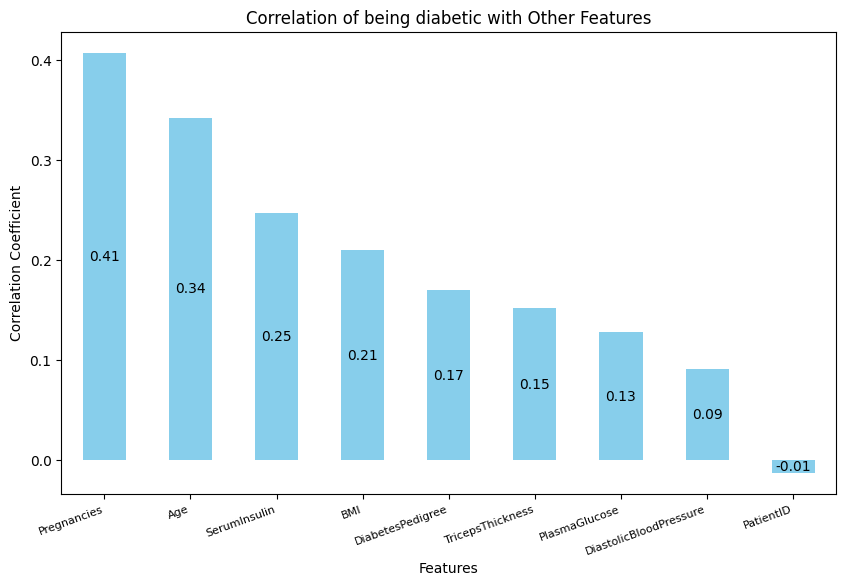

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
diabetic_corr.drop('Diabetic').plot(kind='bar', color='skyblue', ax=ax)
ax.set_title("Correlation of being diabetic with Other Features")
ax.set_ylabel("Correlation Coefficient")
ax.set_xlabel("Features")

for i, value in enumerate(diabetic_corr.drop('Diabetic')):
    rounded_value = round(value, 2)
    bar = ax.patches[i]
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    ax.text(bar_x, bar_height / 2, str(rounded_value), ha='center', va='center', fontsize=10, color='black')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right', fontsize=8)
plt.show()

In [8]:
df_mesurments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [11]:
pip install scikit-learn

     ---------------------------------------- 11.1/11.1 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import sklearn as sk
from sklearn.cluster import KMeans

from the data set we already have more non-diabetic patients this means our model could end up being biased towards non-diabetic diagnosis
maybe when we split the data for training we may need to somehow consider representaion?

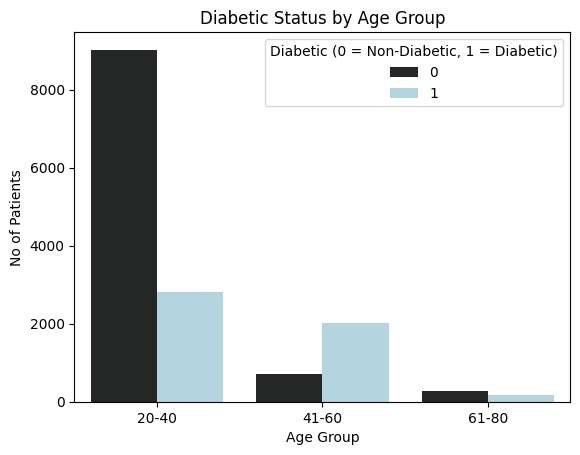

In [13]:
# Create age bins
bins = [20, 40, 60, 80]  # Define age ranges
labels = ['20-40', '41-60', '61-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=df, x='AgeGroup', hue='Diabetic', palette='dark:lightblue')
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


# Women above 40 are more prevelent to type II diabetics and we see that in the data
# discrepency in the 60+ age group could be due to the less data being available in that age group

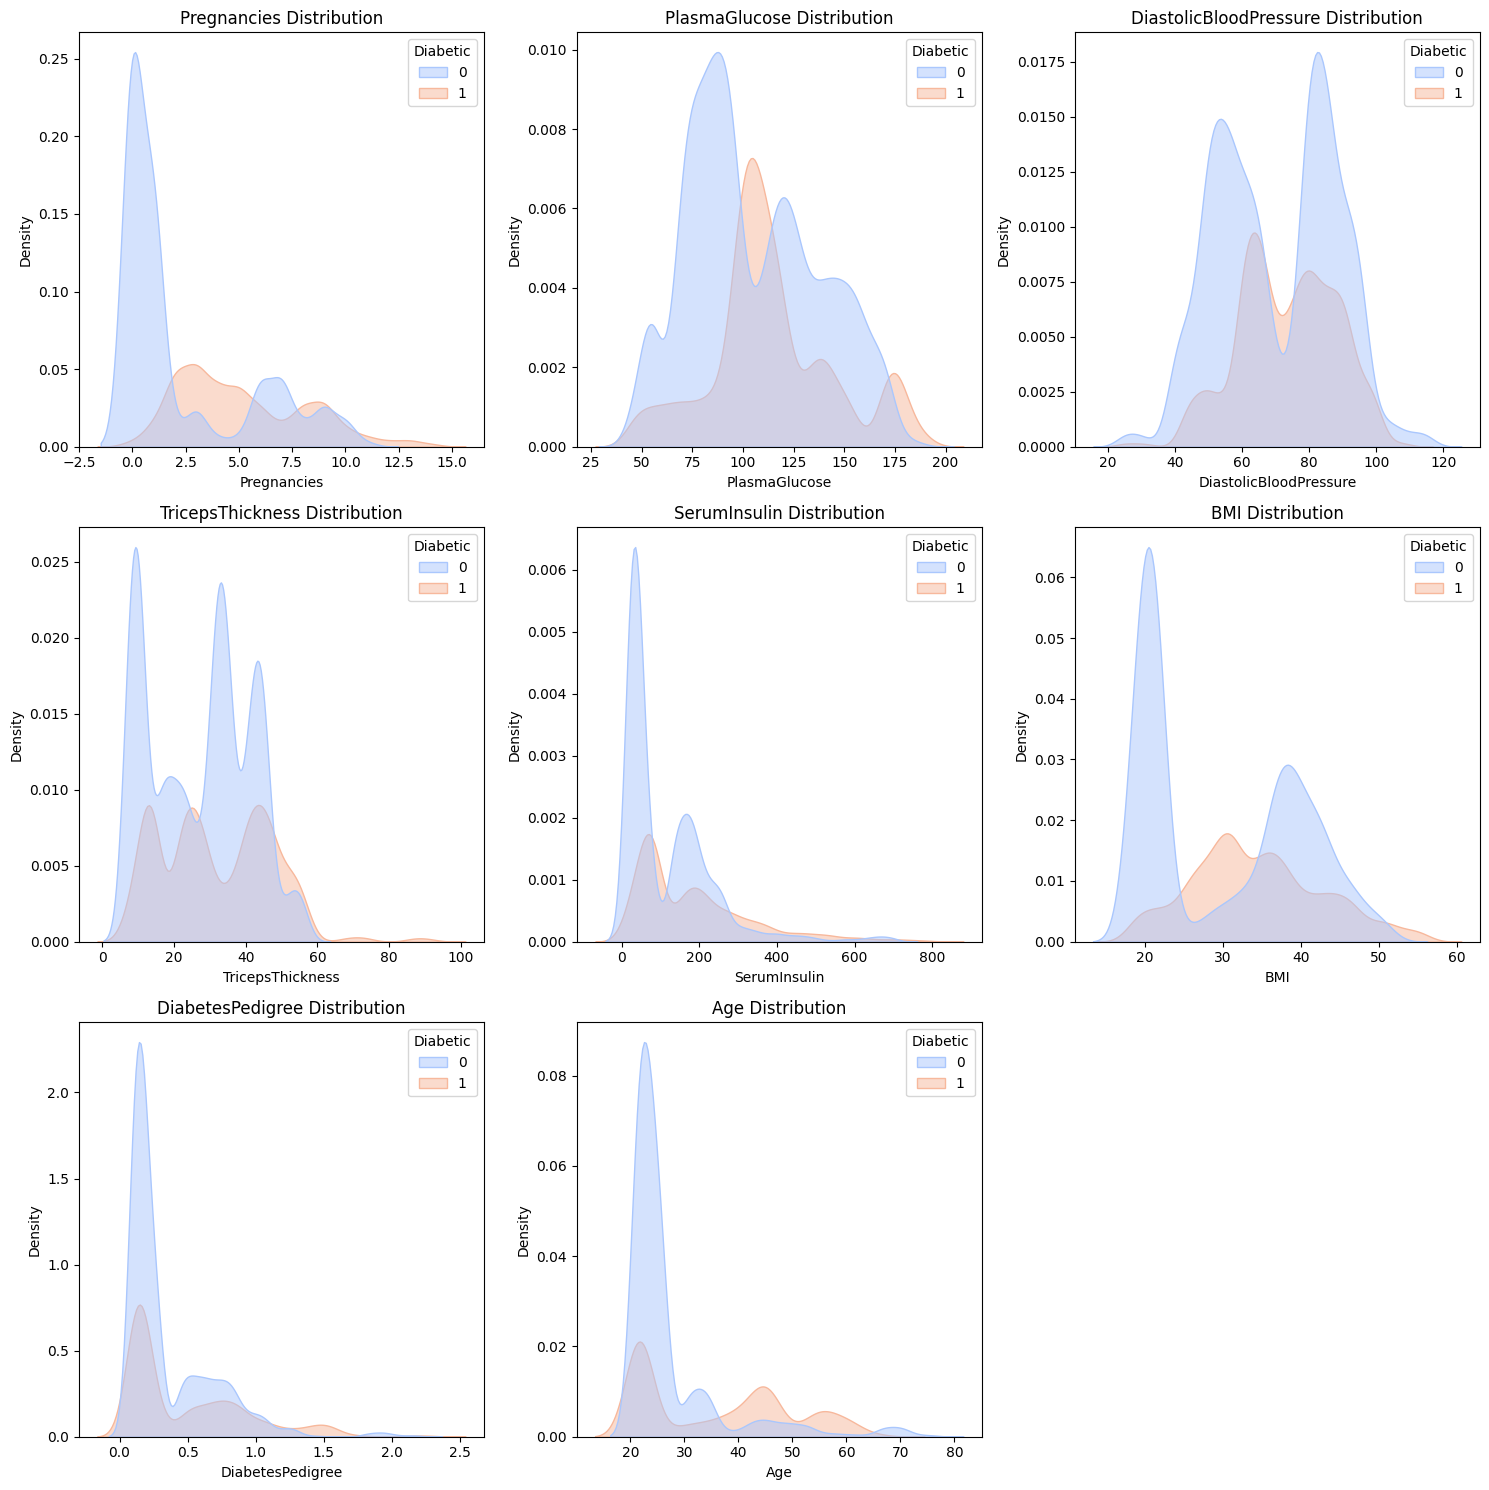

In [14]:
import math
num_features = len(df_mesurments.columns)
cols = 3 
rows = math.ceil(num_features / cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten() 

for i, feature in enumerate(df_mesurments):
    sns.kdeplot(x=df[feature], hue=df["Diabetic"], fill=True, palette="coolwarm", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"{feature} Distribution")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Split 

We gonna start with 80-20 split :
    ||  80% of the dataset will be used for training models.
    || 20% of the dataset will be used for testing models predictions.

We will now prepare our data for use in the various models we plan to test. This preparation includes addressing issues such as data imbalances, handling outliers, and ensuring the dataset is clean and ready for analysis.

# Imbalances
As we saw earlier in univariate analysis, the diabetes class is greatly imbalanced towards a negative diagnosis. Using a model without fixing this imbalance would make it biased towards the majority class. It can also affect many metrics like precision, accuracy, F1 score, and recall. Let's see what each of these metrics mean.

Understanding metrics
Let's first define the following terms as they are used in the formulas for our metrics:

* True positive (TP): When the model correctly predicts that a condition or characteristic is present.
* True negative (TN): When the model correctly predicts that a condition or characteristic is not present.
* False positive (FP): When the model incorrectly predicts that a condition or attribute is present when it is actually not.
* False negative (FN): When the model incorrectly predicts that a condition or attribute is not present when it actually is.

 # Metrics:

* Accuracy: A metric that indicates how often a machine learning model makes correct predictions. It is calculated by dividing the number of correct predictions by the total number of predictions made.

* Precision: A metric that evaluates how accurately a machine learning model identifies the positive class. It is calculated by dividing the number of true positive predictions by the total number of positive predictions (true positives + false positives).

* Recall: A metric that measures how well a machine learning model identifies positive instances. It is calculated by dividing the number of true positives by the total number of actual positive samples (true positives + false negatives). Recall reflects the model’s ability to capture all positive cases in the dataset. 

* F1-score: A metric that balances precision and recall by computing their harmonic mean. The relative importance of both metrics is equal in the F1 score calculation. The best possible F1 score is 1, indicating perfect model performance with all predictions being correct. The worst possible F1 score is 0, meaning the model did not correctly classify any positive instances.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
target = "Diabetic" 
X = df_mesurments
y = df[target]

In [17]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns
print(num_features)
print(cat_features)

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')
Index([], dtype='object')


In [18]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  
])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [20]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)


In [21]:
print(y_pred)
print(len(y_pred))
print(y_test)
print(len(y_test))

[1 0 0 ... 0 0 0]
3000
4803     1
13427    0
7173     0
7754     1
11847    0
        ..
610      0
7289     0
4630     0
9023     0
7420     0
Name: Diabetic, Length: 3000, dtype: int64
3000


In [22]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter Tuning with GridSearchCV (Optional)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Accuracy: 0.9326666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      2000
           1       0.92      0.88      0.90      1000

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000


Confusion Matrix:
 [[1921   79]
 [ 123  877]]
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9400833333333333


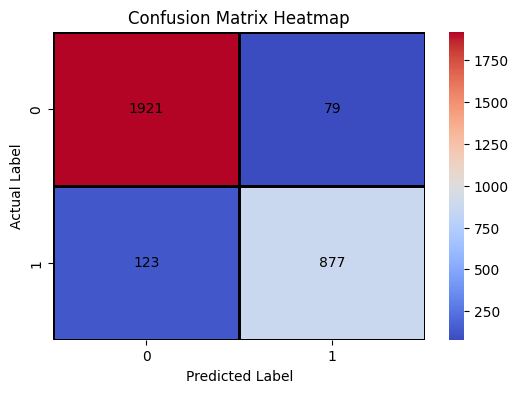

In [23]:
# True positive (TP): 1915
# True negative (TN): 888
# False positive (FP): 85  . the model incorrectly predicts that a woman is diabetic when she is actually not.
# False negative (FN): 112 . the model incorrectly predicts that a woman is not diabetic when she actually is.
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor='black',  annot_kws={"color": "black"})  
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [24]:
# Create a function to make predictions for new patients
def predict_diabetes(pregnancies, plasma_glucose, blood_pressure, triceps, insulin, bmi, pedigree, age):
    # Create a DataFrame with the input values
    new_patient = pd.DataFrame([[pregnancies, plasma_glucose, blood_pressure, triceps, 
                               insulin, bmi, pedigree, age]], 
                             columns=df_mesurments.columns)
    
    # Preprocess the input using the same preprocessor
    new_patient_processed = preprocessor.transform(new_patient)
    
    # Make prediction
    prediction = grid_search.predict(new_patient_processed)
    probability = grid_search.predict_proba(new_patient_processed)
    
    return prediction[0], probability[0][1]

# Example usage:
# Test with sample data
sample_patient = {
    'pregnancies': 2,
    'plasma_glucose': 130,
    'blood_pressure': 80,
    'triceps': 23,
    'insulin': 150,
    'bmi': 34.5,
    'pedigree': 0.205,
    'age': 45
}

result, prob = predict_diabetes(**sample_patient)
print(f"Prediction: {'Diabetic' if result == 1 else 'Not Diabetic'}")
print(f"Probability of being diabetic: {prob:.2%}")

Prediction: Diabetic
Probability of being diabetic: 99.50%


In [32]:
# Test another case
result, prob = predict_diabetes(
    pregnancies=1,
    plasma_glucose=185,
    blood_pressure=70,
    triceps=20,
    insulin=180,
    bmi=25.5,
    pedigree=0.259,
    age=60
)
print(f"Prediction: {'Diabetic' if result == 1 else 'Not Diabetic'}")
print(f"Probability of being diabetic: {prob:.2%}")

Prediction: Diabetic
Probability of being diabetic: 79.50%


In [33]:
# Save the model and preprocessor
import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, 'ProjectMain/diabetes_model.joblib')
# Save the preprocessor
joblib.dump(preprocessor, 'ProjectMain/preprocessor.joblib')

['preprocessor.joblib']